# Mini Trabalho 1

In [25]:
import random
import time
import matplotlib.pyplot as plt

#### 1. Gerar aleatoriamente uma colecao de inteiros numa list

In [26]:
def randomIntList(size=25, r=[-1000,1000]):
    return [random.randint(r[0], r[1]) for i in range(size)]


In [27]:
print(randomIntList())
print(list(range(25)))

[736, -894, -9, 846, 57, 213, 241, -422, 968, 694, 620, 25, 621, 613, 32, -684, 382, 924, -835, 915, 985, -887, 336, -314, -984]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


#### 2. Implementacao de algoritmos de ordenamento comuns

In [28]:
def BubbleSort(values):
    for i in range(len(values)):
        for j in range(len(values)-1-i):
            if values[j] > values[j+1]:
                values[j], values[j+1] = values[j+1], values[j]

def SelectionSort(values):
    for i in range(len(values)):
        minimum = i
        for j in range(i, len(values)):
            minimum = j if values[minimum] > values[j] else minimum
        values[i],values[minimum] = values[minimum], values[i]

def InsertionSort(values):
    for i in range(1, len(values)):
        for j in range(i, 0, -1):
            if values[j] < values[j-1]:
                values[j], values[j-1] = values[j-1], values[j]

def ShellSort(values):
    leap = len(values) // 2
    while leap > 0:
        for i in range(leap, len(values)):
            for j in range(i-leap, -1, -leap):
                if values[j+leap] <= values[j]:
                    values[j] , values[j+leap] = values[j+leap] , values[j]
                else:
                    break
        leap//=2

def MergeSort(values):
    if len(values) > 1:
        M = int(len(values)/2)
        L_arr, R_arr = values[:M], values[M:]
        MergeSort(L_arr)
        MergeSort(R_arr)

        L = R = V = 0
        while L<len(L_arr) and R<len(R_arr):
            if L_arr[L] >= R_arr[R]:
                values[V] = R_arr[R]
                R+=1
                V+=1
            else:
                values[V] = L_arr[L]
                L+=1
                V+=1

        while L<len(L_arr):
            values[V] = L_arr[L]
            L+=1
            V+=1
        while R<len(R_arr):
            values[V] = R_arr[R]
            R+=1
            V+=1

def QuickSort(values, L=-1, H=-1):
    if L < H:
        P = values[H]
        S=L
        for i in range(L,H):
            if values[i] < P:
                values[i] ,values[S] =values[S], values[i]
                S+=1
        values[H], values[S] = values[S], values[H]

        QuickSort(values, L, S-1)
        QuickSort(values, S+1, H)
    if L == -1 and H==-1:
        QuickSort(values,0, len(values)-1)

In [29]:
v = randomIntList()
v1,v2,v3,v4,v5,v6=v.copy(), v.copy(), v.copy(),v.copy(), v.copy(), v.copy()

BubbleSort(v1)
SelectionSort(v2)
InsertionSort(v3)
ShellSort(v4)
MergeSort(v5)
QuickSort(v6)
print(v)
print(v1)
print(v2)
print(v3)
print(v4)
print(v5)
print(v1)
print(v6)

[154, 958, 300, 339, -279, -903, 244, -313, -564, -669, -431, 235, -623, -86, -775, 442, -85, 400, 332, -285, 160, -783, 93, 229, -605]
[-903, -783, -775, -669, -623, -605, -564, -431, -313, -285, -279, -86, -85, 93, 154, 160, 229, 235, 244, 300, 332, 339, 400, 442, 958]
[-903, -783, -775, -669, -623, -605, -564, -431, -313, -285, -279, -86, -85, 93, 154, 160, 229, 235, 244, 300, 332, 339, 400, 442, 958]
[-903, -783, -775, -669, -623, -605, -564, -431, -313, -285, -279, -86, -85, 93, 154, 160, 229, 235, 244, 300, 332, 339, 400, 442, 958]
[-903, -783, -775, -669, -623, -605, -564, -431, -313, -285, -279, -86, -85, 93, 154, 160, 229, 235, 244, 300, 332, 339, 400, 442, 958]
[-903, -783, -775, -669, -623, -605, -564, -431, -313, -285, -279, -86, -85, 93, 154, 160, 229, 235, 244, 300, 332, 339, 400, 442, 958]
[-903, -783, -775, -669, -623, -605, -564, -431, -313, -285, -279, -86, -85, 93, 154, 160, 229, 235, 244, 300, 332, 339, 400, 442, 958]
[-903, -783, -775, -669, -623, -605, -564, -431,

#### 3. Criacao de uma bateria de testes para a conometragem de cada um dos algoritmos

**timeAverageCase** - Tira proveito da funcao *randomIntList* de modo a que o input de teste seja aleatorio
**timeBestCase** - Todos os inputs de teste estarao sempre por ordem crescente
**timeWorstCase** - Todos os inputs de teste estarao sempre por ordem decrescente
 ###### *Nota: Apesar do nome da funcao, nem sempre uma lista previamente ordenada sera o melhor/pior caso para cada algoritmo. Mais a frente veremos que para alguns, a performance e melhor quando a lista se encontra baralhada*


In [30]:
MinN, MaxN = 0, 1000
Step = 100
Batch = 35

def timeAverageCase(F):
    N,T=[],[]
    for i in range(MinN,MaxN,Step):
        N.append(i)
        t=0
        for j in range(Batch):
            L = randomIntList(i)
            start = time.time()
            F(L)
            end = time.time()
            t+= end - start
        T.append(t/Batch)
    return N,T
def timeBestCase(F):
    N,T=[],[]
    for i in range(MinN,MaxN,Step):
        N.append(i)
        t=0
        for j in range(Batch):
            L = list(range(i))
            start = time.time()
            F(L)
            end = time.time()
            t+= end - start
        T.append(t/Batch)
    return N,T
def timeWorstCase(F):
    N,T=[],[]
    for i in range(MinN,MaxN,Step):
        N.append(i)
        t=0
        for j in range(Batch):
            L = list(reversed(range(i)))
            start = time.time()
            F(L)
            end = time.time()
            t+= end - start
        T.append(t/Batch)
    return N,T



In [31]:
start = time.time()
NShell,TShell=timeAverageCase(ShellSort)
NBubble,TBubble=timeAverageCase(BubbleSort)
NSelection,TSelection=timeAverageCase(SelectionSort)
NInsertion,TInsertion=timeAverageCase(InsertionSort)
NQuick,TQuick=timeAverageCase(QuickSort)
NMerge,TMerge=timeAverageCase(MergeSort)
print("total elapsed time:", time.time() - start, "seconds")

In [38]:
start = time.time()
NShellB,TShellB=timeBestCase(ShellSort)
NQuickB,TQuickB=timeBestCase(QuickSort)
NMergeB,TMergeB=timeBestCase(MergeSort)
NBubbleB,TBubbleB=timeBestCase(BubbleSort)
NInsertionB,TInsertionB=timeBestCase(InsertionSort)
NSelectionB,TSelectionB=timeBestCase(SelectionSort)
print("total elapsed time:", time.time() - start, "seconds")

In [45]:
start = time.time()
NShellW,TShellW=timeWorstCase(ShellSort)
NBubbleW,TBubbleW=timeWorstCase(BubbleSort)
NSelectionW,TSelectionW=timeWorstCase(SelectionSort)
NInsertionW,TInsertionW=timeWorstCase(InsertionSort)
NQuickW,TQuickW=timeWorstCase(QuickSort)
NMergeW,TMergeW=timeWorstCase(MergeSort)
print("total elapsed time:", time.time() - start, "seconds")

16.703975439071655  total elapsed time


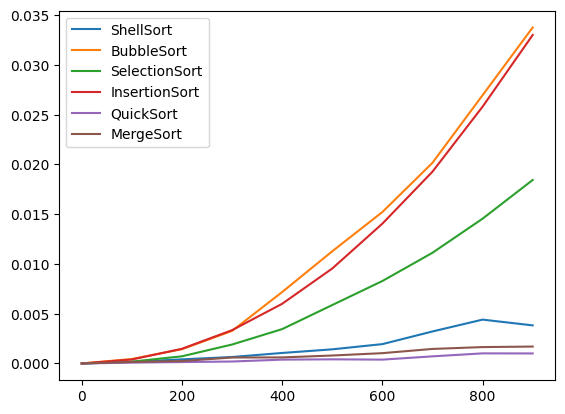

In [46]:
plt.plot(NShell, TShell, label='ShellSort')
plt.plot(NBubble, TBubble, label='BubbleSort')
plt.plot(NSelection, TSelection, label='SelectionSort')
plt.plot(NInsertion, TInsertion, label='InsertionSort')
plt.plot(NQuick, TQuick, label='QuickSort')
plt.plot(NMerge, TMerge, label='MergeSort')
plt.legend(loc='best')
plt.show()

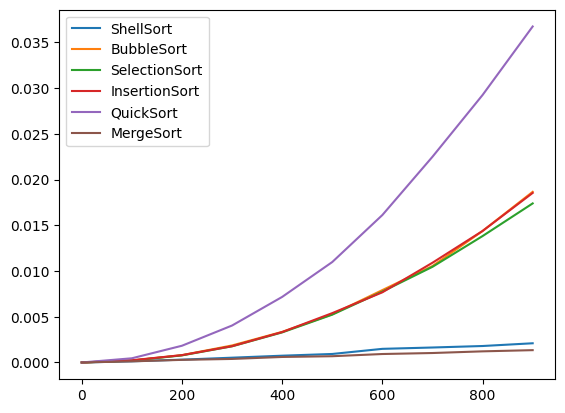

In [47]:
plt.plot(NShellB, TShellB, label='ShellSort')
plt.plot(NBubbleB, TBubbleB, label='BubbleSort')
plt.plot(NSelectionB, TSelectionB, label='SelectionSort')
plt.plot(NInsertionB, TInsertionB, label='InsertionSort')
plt.plot(NQuickB, TQuickB, label='QuickSort')
plt.plot(NMergeB, TMergeB, label='MergeSort')
plt.legend(loc='best')
plt.show()

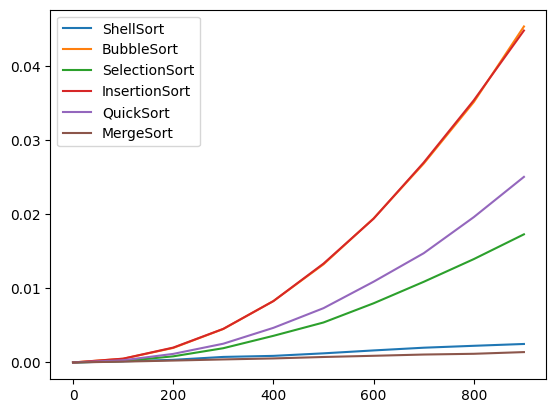

In [48]:
plt.plot(NShellW, TShellW, label='ShellSort')
plt.plot(NBubbleW, TBubbleW, label='BubbleSort')
plt.plot(NSelectionW, TSelectionW, label='SelectionSort')
plt.plot(NInsertionW, TInsertionW, label='InsertionSort')
plt.plot(NQuickW, TQuickW, label='QuickSort')
plt.plot(NMergeW, TMergeW, label='MergeSort')
plt.legend(loc='best')
plt.show()